In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xarray as xr


In [34]:
regional_data = xr.open_dataset('data/CHIRPS/chirps-v2.0.monthly.nc')

# View the data
print(regional_data)

<xarray.Dataset> Size: 30GB
Dimensions:    (latitude: 2000, longitude: 7200, time: 528)
Coordinates:
  * latitude   (latitude) float32 8kB -49.97 -49.92 -49.88 ... 49.87 49.92 49.97
  * longitude  (longitude) float32 29kB -180.0 -179.9 -179.9 ... 179.9 180.0
  * time       (time) datetime64[ns] 4kB 1981-01-01 1981-02-01 ... 2024-12-01
Data variables:
    precip     (time, latitude, longitude) float32 30GB ...
Attributes: (12/15)
    Conventions:       CF-1.6
    title:             CHIRPS Version 2.0
    history:           created by Climate Hazards Group
    version:           Version 2.0
    date_created:      2025-01-15
    creator_name:      Pete Peterson
    ...                ...
    reference:         Funk, C.C., Peterson, P.J., Landsfeld, M.F., Pedreros,...
    comments:           time variable denotes the first day of the given month.
    acknowledgements:  The Climate Hazards Group InfraRed Precipitation with ...
    ftp_url:           ftp://chg-ftpout.geog.ucsb.edu/pub/org/ch

In [35]:
# View regional data as dataframe
time_series_data = regional_data['precip']

In [36]:
min_lat = 3.5
max_lat = 8.5
min_lon = 38
max_lon = 50

eastern_east_data = time_series_data.sel(latitude=slice(min_lat, max_lat), longitude=slice(min_lon, max_lon))

In [37]:
eastern_east_time_series = eastern_east_data.to_series()

In [38]:
eastern_east_time_series.describe()

count    1.146816e+07
mean     3.599176e+01
std      5.348967e+01
min      3.431352e-10
25%      2.571667e+00
50%      1.058736e+01
75%      4.890526e+01
max      6.407176e+02
Name: precip, dtype: float64

In [39]:
eastern_east_time_series = eastern_east_time_series.reset_index()

# Monthly Average Precipitation

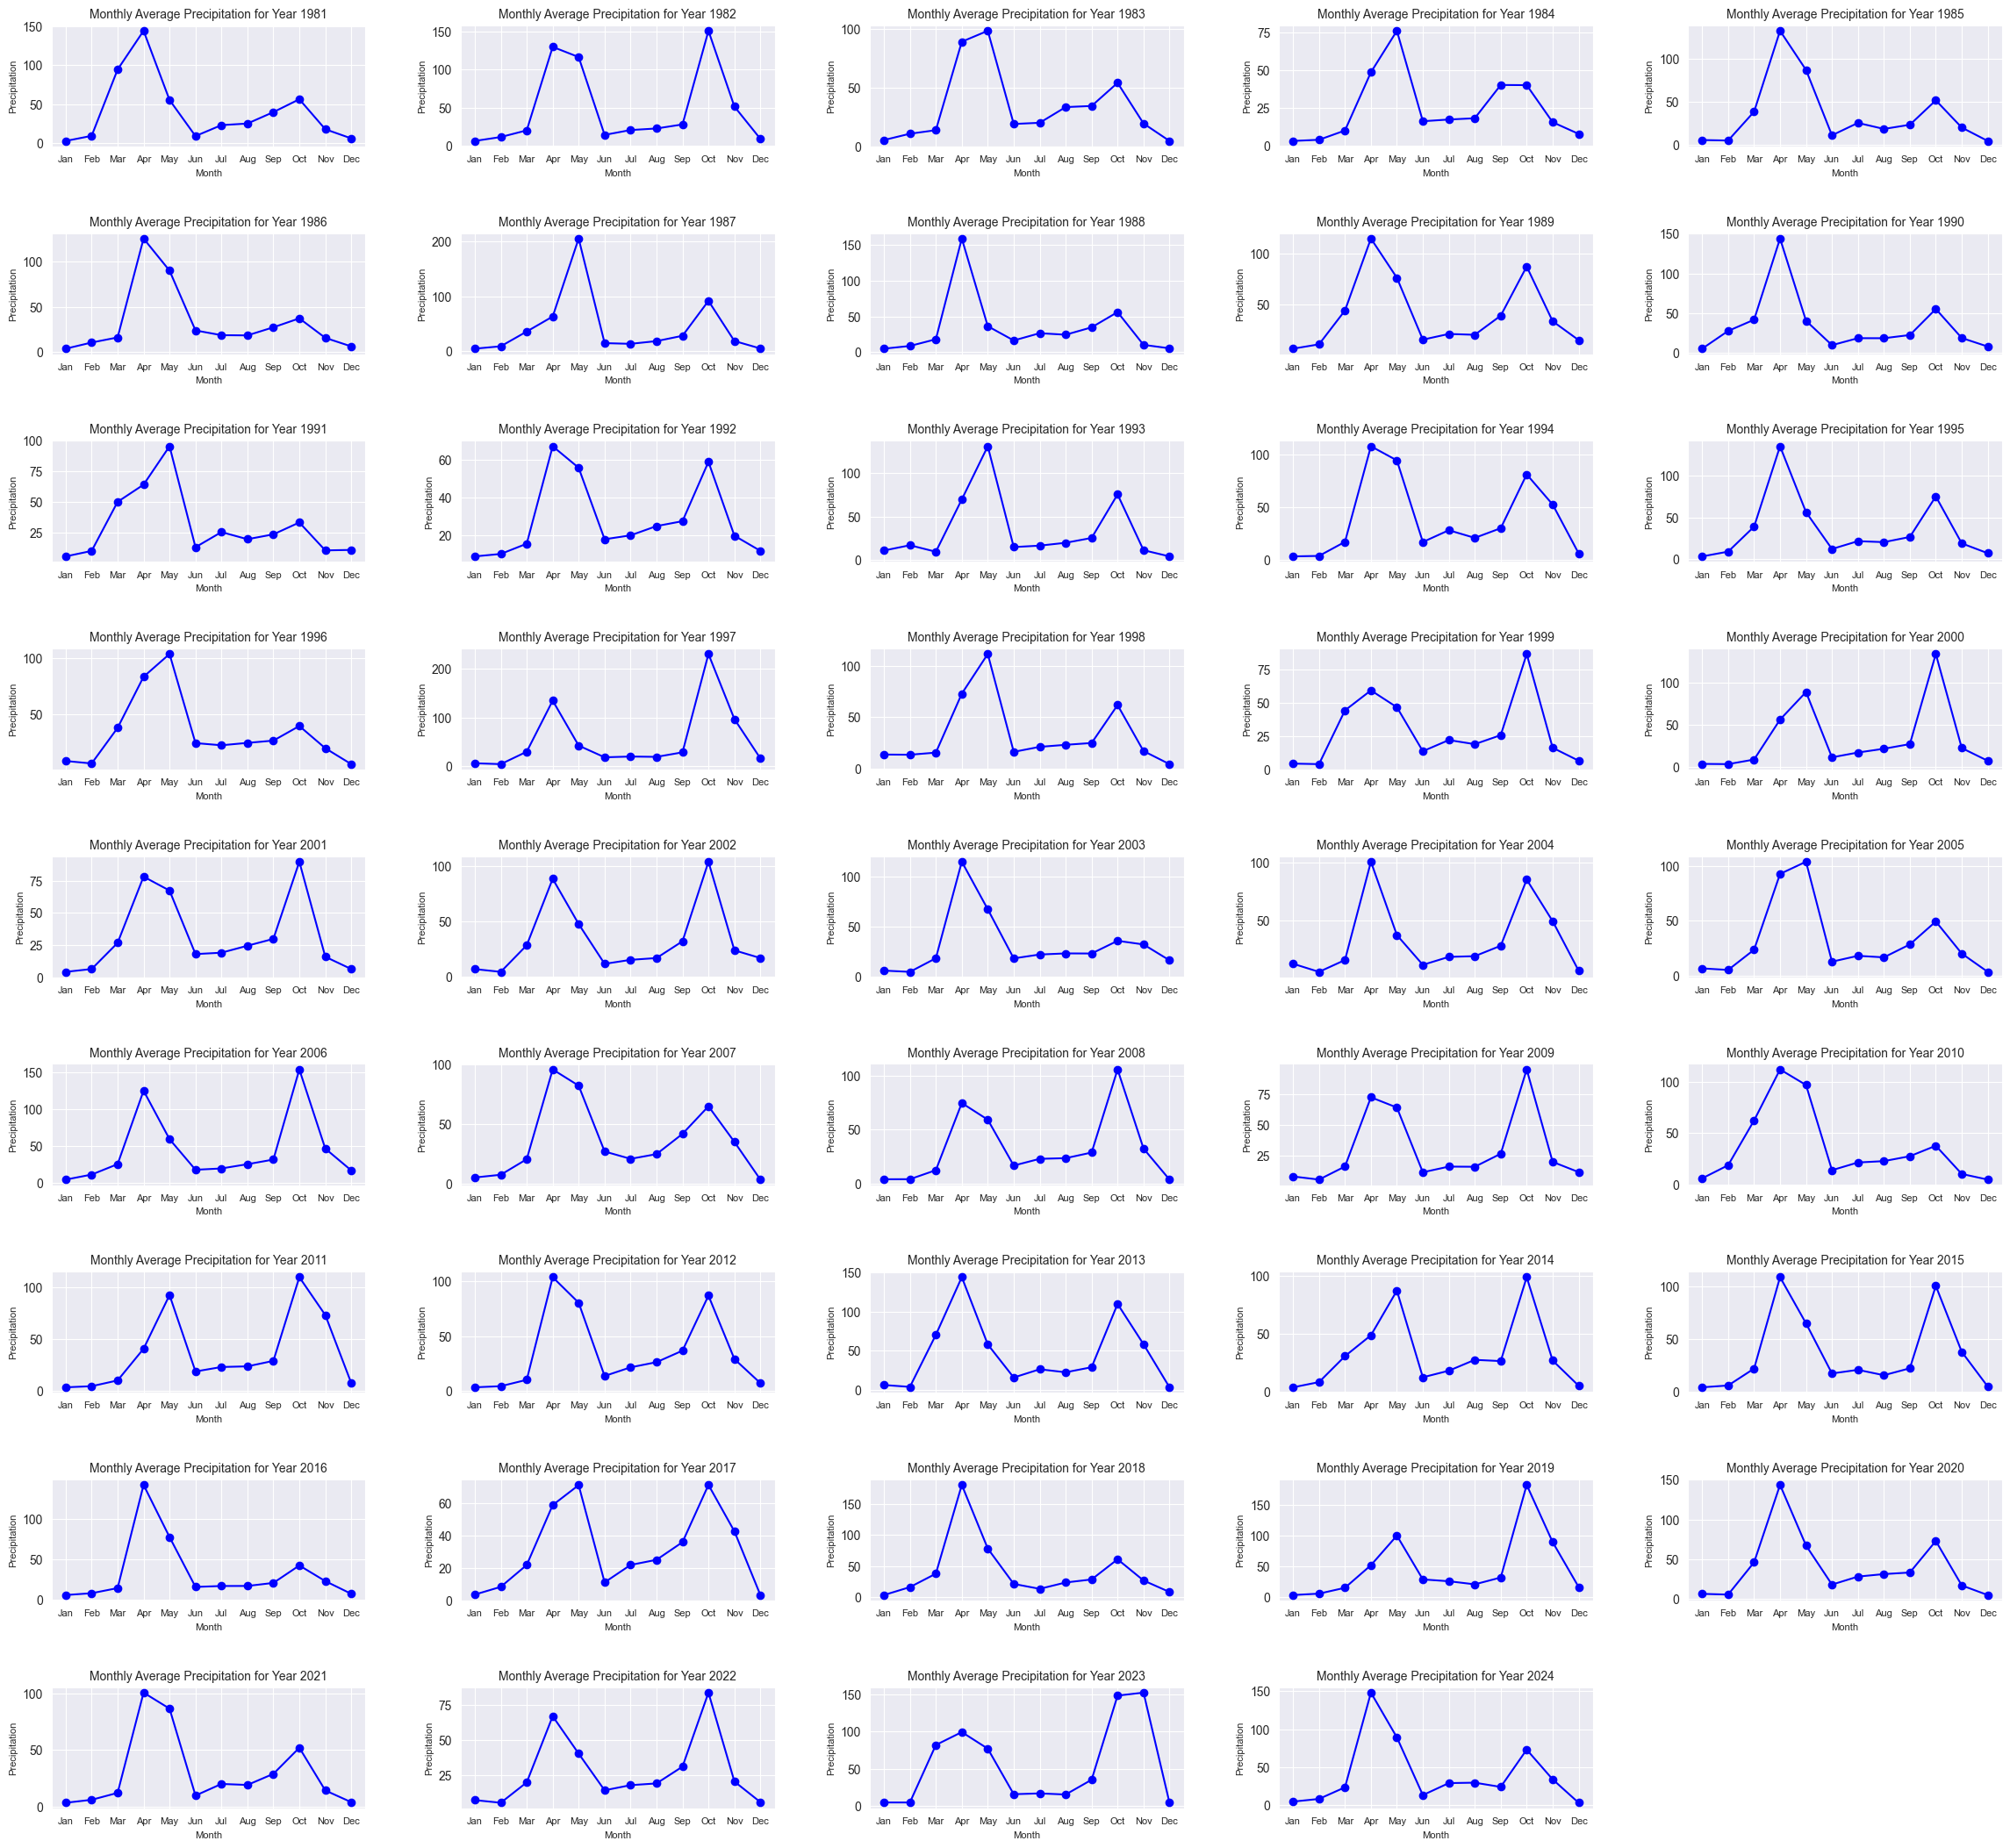

In [40]:
### Mean Precip.

# First, reset the index to ensure 'time' becomes a column
data = eastern_east_time_series.copy().reset_index()

# Extract year and month from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

# Now, we can group by 'year' and 'month' and plot
unique_years = data['year'].unique()

# Create a 6x7 matrix of subplots
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(24, 22))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = data[data['year'] == year]

    # Group by month and calculate the mean precipitation for that month
    monthly_mean_precip = year_data.groupby('month')['precip'].mean()

    # Plot the data on the corresponding axis
    ax = axes[idx]
    ax.plot(monthly_mean_precip.index, monthly_mean_precip.values, marker='o', linestyle='-', color='b')

    # Add labels and title
    ax.set_title(f'Monthly Average Precipitation for Year {year}', fontsize=10)
    ax.set_xlabel('Month', fontsize=8)
    ax.set_ylabel('Precipitation', fontsize=8)

    # Set x-axis labels as month names
    ax.set_xticks(monthly_mean_precip.index)
    ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=8)

    # Show grid for better readability
    ax.grid(True)

# Hide unused subplots if there are fewer than 42 years
for i in range(len(unique_years), len(axes)):
    axes[i].axis('off')

plt.savefig('figures/eastAf_monthly_mean_trends.png')
plt.show()

# Monthly Maximum Precipitation Levels

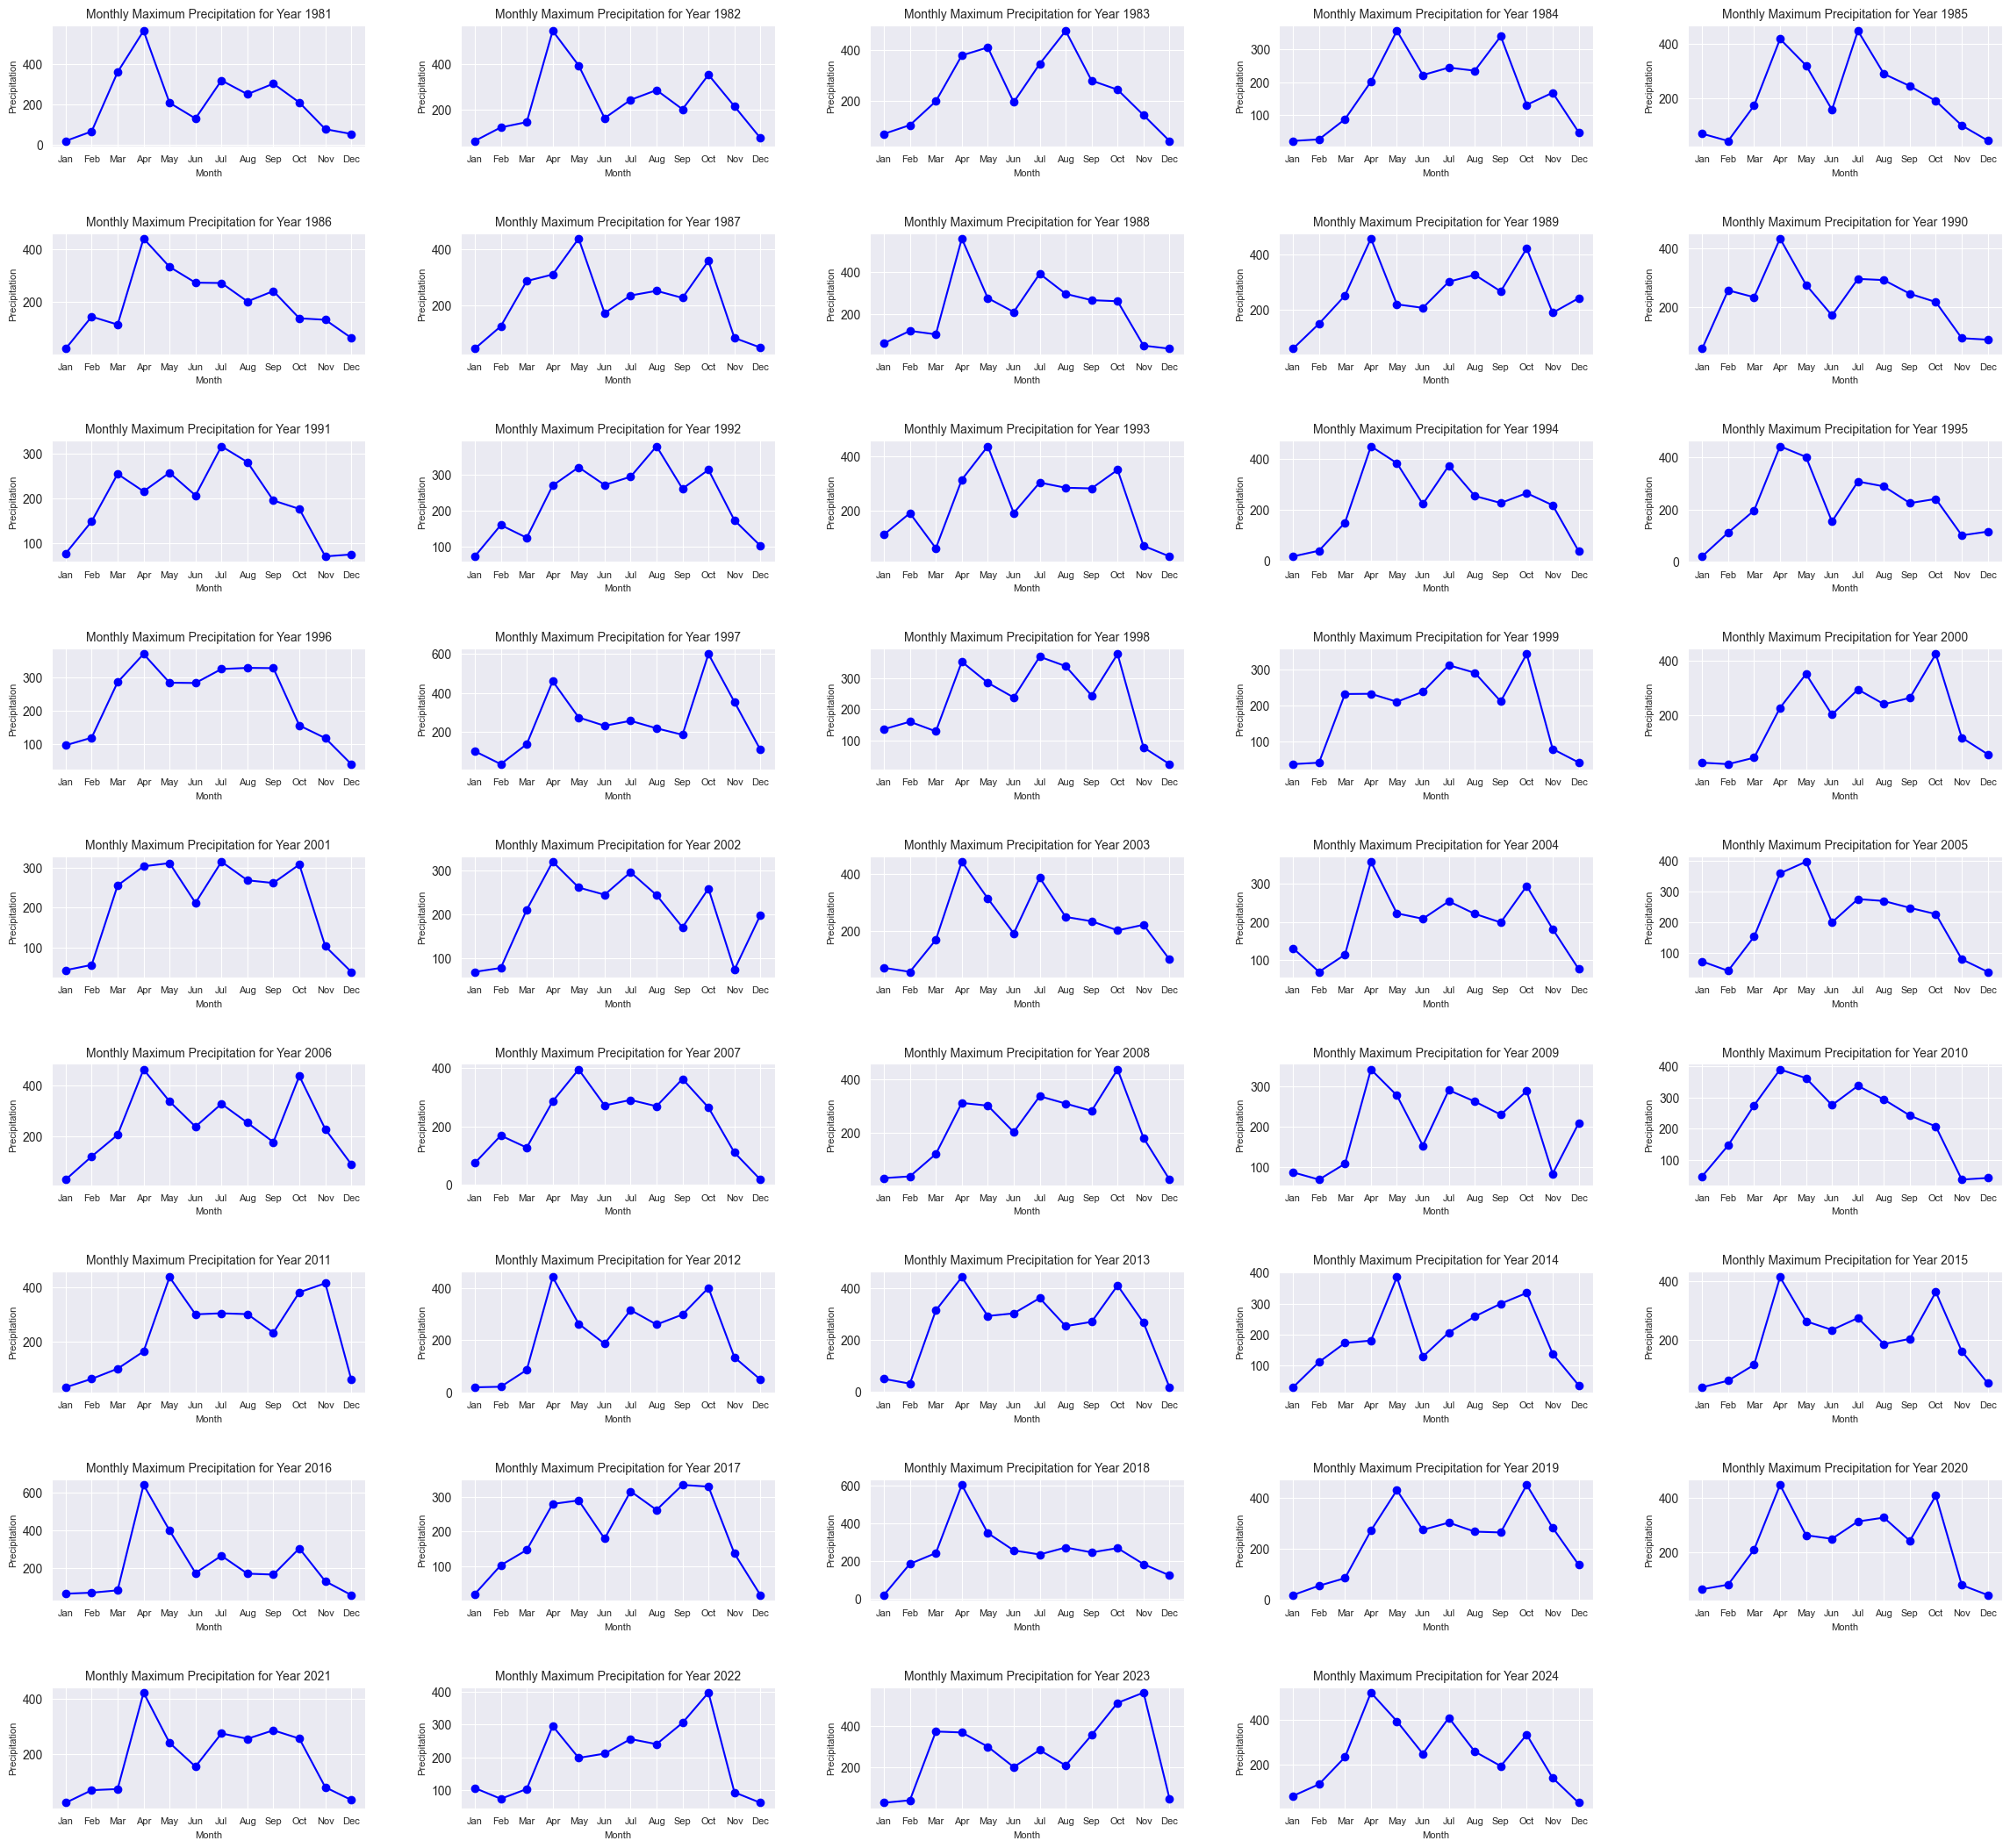

In [41]:
# Monthly Maximum Precip.

# First, reset the index to ensure 'time' becomes a column
data = eastern_east_time_series.copy().reset_index()

# Extract year and month from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

# Check the new structure of the data
# print(data.head())

# Now, we can group by 'year' and 'month' and plot
unique_years = data['year'].unique()

# Create a 6x7 matrix of subplots
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(24, 22))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = data[data['year'] == year]

    # Group by month and calculate the mean precipitation for that month
    monthly_max_precip = year_data.groupby('month')['precip'].max()
    monthly_max_precip


    # Plot the data on the corresponding axis
    ax = axes[idx]
    ax.plot(monthly_max_precip.index, monthly_max_precip.values, marker='o', linestyle='-', color='b')

    # Add labels and title
    ax.set_title(f'Monthly Maximum Precipitation for Year {year}', fontsize=10)
    ax.set_xlabel('Month', fontsize=8)
    ax.set_ylabel('Precipitation', fontsize=8)

    # Set x-axis labels as month names
    ax.set_xticks(monthly_max_precip.index)
    ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=8)

    # Show grid for better readability
    ax.grid(True)

# Hide unused subplots if there are fewer than 42 years
for i in range(len(unique_years), len(axes)):
    axes[i].axis('off')

plt.savefig('figures/eastAf_monthly_max_trends.png')
plt.show()

# Monthly Minimum Precipitation Levels

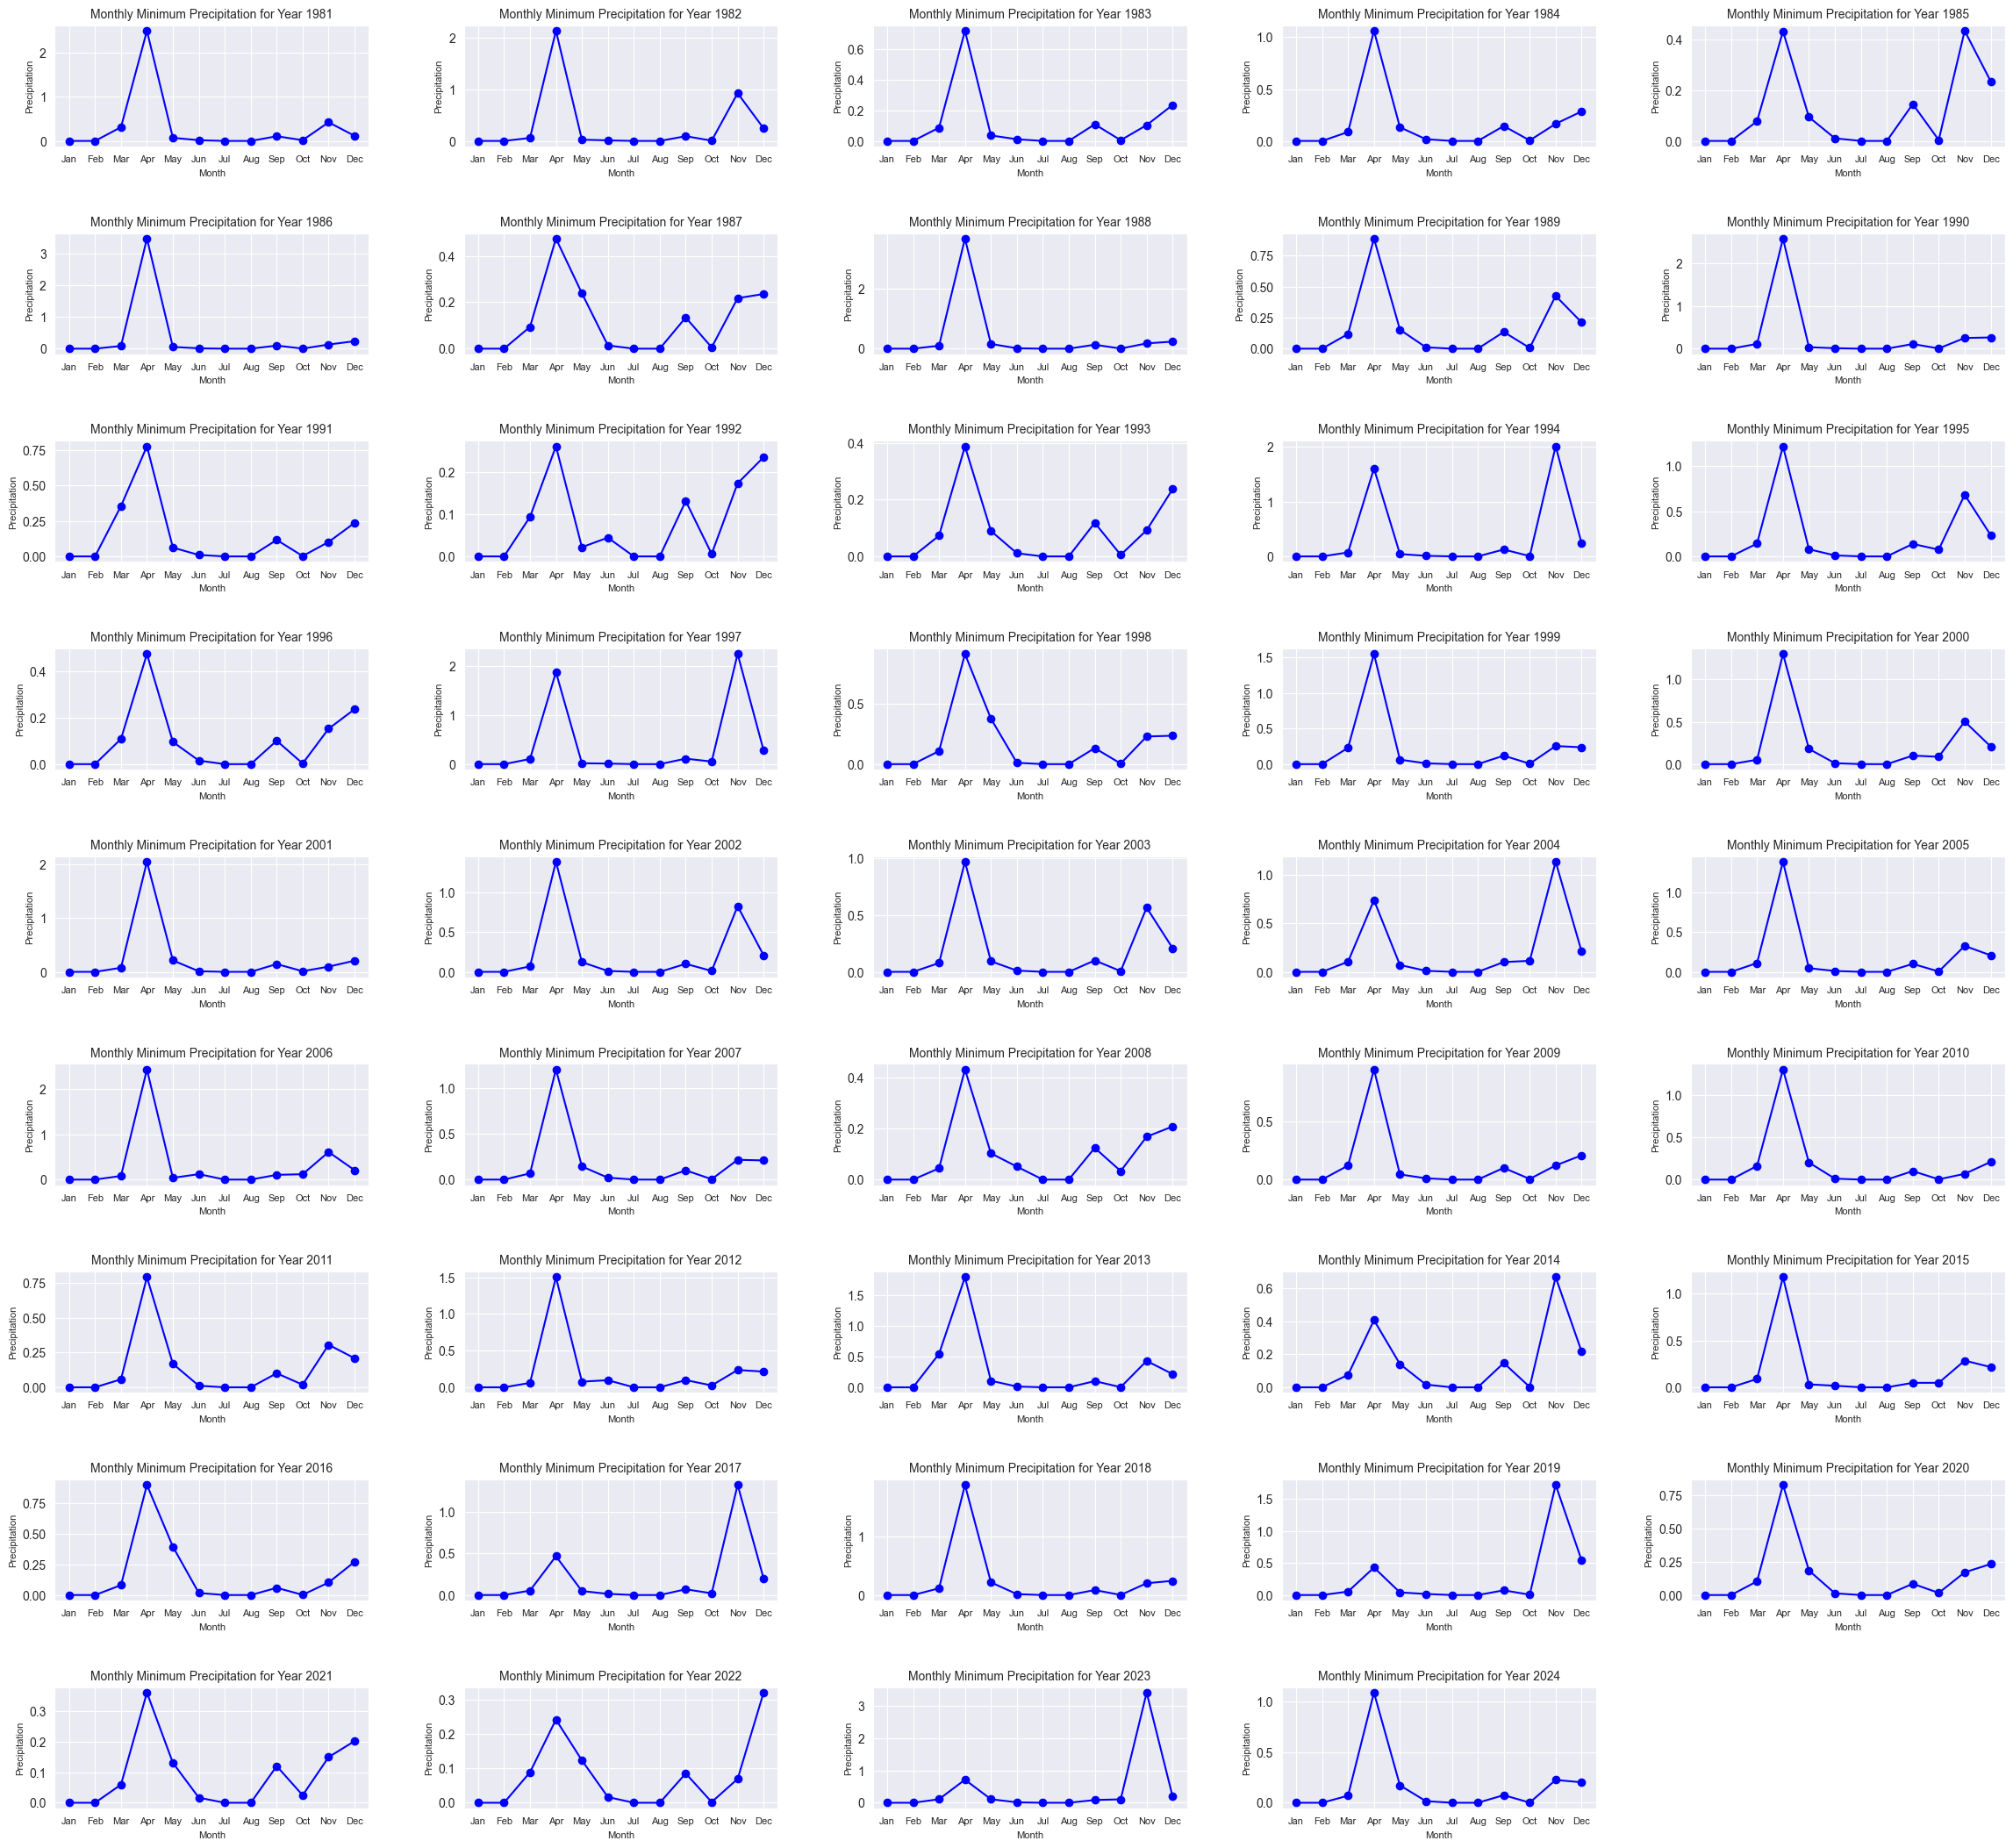

In [42]:
# Monthly Minimum Precip.

# First, reset the index to ensure 'time' becomes a column
data = eastern_east_time_series.copy().reset_index()

# Extract year and month from the 'time' column
data['year'] = data['time'].dt.year
data['month'] = data['time'].dt.month

# Check the new structure of the data
# print(data.head())

# Now, we can group by 'year' and 'month' and plot
unique_years = data['year'].unique()

# Create a 6x7 matrix of subplots
fig, axes = plt.subplots(nrows=9, ncols=5, figsize=(24, 22))
fig.tight_layout(pad=5.0)  # Adjust spacing between subplots

# Flatten the axes array for easier iteration
axes = axes.flatten()

for idx, year in enumerate(unique_years):
    # Filter data for the current year
    year_data = data[data['year'] == year]

    # Group by month and calculate the mean precipitation for that month
    monthly_min_precip = year_data.groupby('month')['precip'].min()

    # Plot the data on the corresponding axis
    ax = axes[idx]
    ax.plot(monthly_min_precip.index, monthly_min_precip.values, marker='o', linestyle='-', color='b')

    # Add labels and title
    ax.set_title(f'Monthly Minimum Precipitation for Year {year}', fontsize=10)
    ax.set_xlabel('Month', fontsize=8)
    ax.set_ylabel('Precipitation', fontsize=8)

    # Set x-axis labels as month names
    ax.set_xticks(monthly_min_precip.index)
    ax.set_xticklabels(["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"], fontsize=8)

    # Show grid for better readability
    ax.grid(True)

# Hide unused subplots if there are fewer than 42 years
for i in range(len(unique_years), len(axes)):
    axes[i].axis('off')

plt.savefig('figures/eastAf_monthly_min_trends.png')
plt.show()